In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as mlt

# Display plots inside notebook
%matplotlib inline

sn.set(style='whitegrid')

In [2]:
df = pd.read_excel("Telco_customer_churn.xlsx")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [29]:
# Drop non-useful columns
df.drop(columns=[
    'CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
    'Lat Long', 'Latitude', 'Longitude'
], inplace=True)

# Convert Total Charges to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Drop rows with missing Total Charges
df.dropna(subset=['Total Charges'], inplace=True)

df.shape

df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [3]:
df['Monthly Charges'].max()

118.75

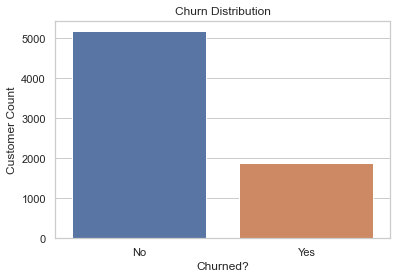

In [4]:
churn_counts = df['Churn Label'].value_counts()
sn.barplot(x=churn_counts.index, y=churn_counts.values)
mlt.title("Churn Distribution")
mlt.xlabel("Churned?")
mlt.ylabel("Customer Count")
mlt.show()

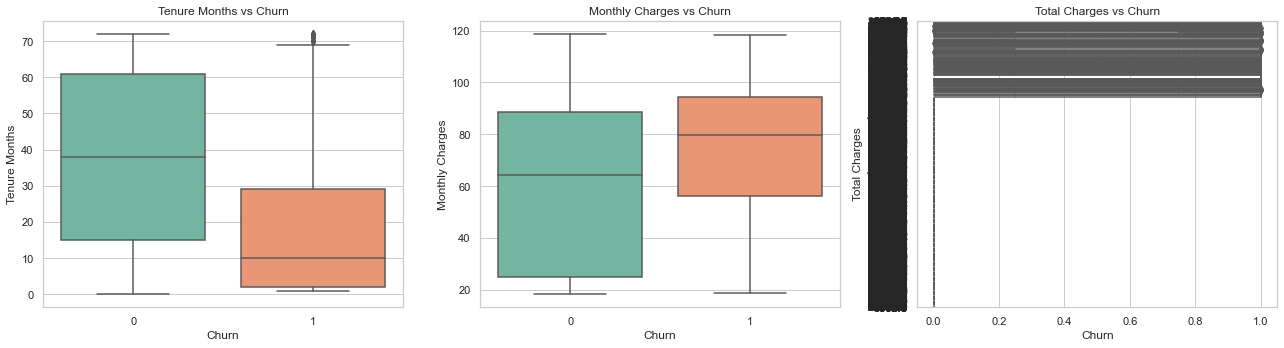

In [5]:
# Create a churn flag column (0 or 1)
df['Churn'] = df['Churn Label'].apply(lambda x: 1 if x == 'Yes' else 0)

# Plot distribution of numeric features
numeric_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges']
mlt.figure(figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    mlt.subplot(1, 3, i+1)
    sn.boxplot(x='Churn', y=col, data=df, palette='Set2')
    mlt.title(f'{col} vs Churn')

mlt.tight_layout()
mlt.show()

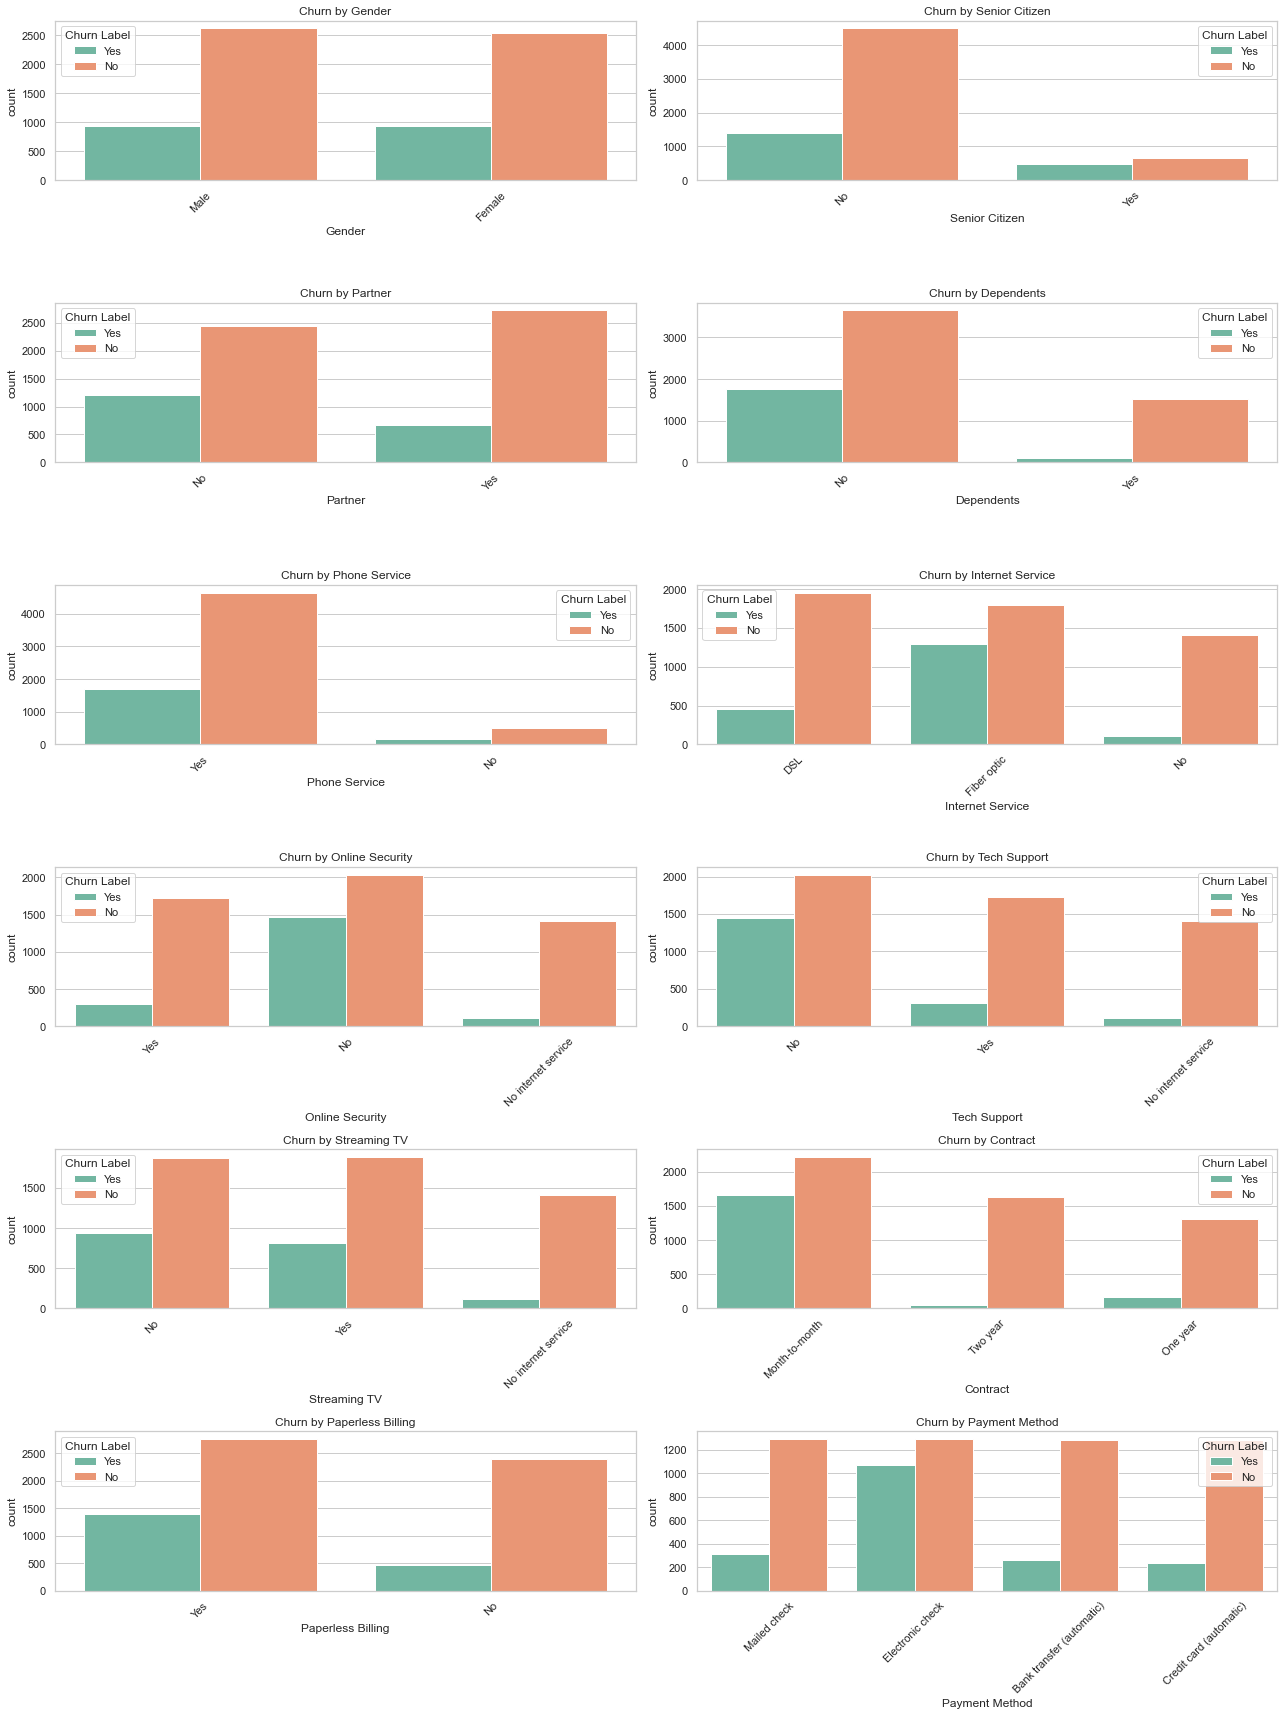

In [22]:
# Categorical features for EDA
categorical_features = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents',
    'Phone Service', 'Internet Service', 'Online Security',
    'Tech Support', 'Streaming TV', 'Contract',
    'Paperless Billing', 'Payment Method'
]

# Plotting
mlt.figure(figsize=(18, 24))
sn.set(style='whitegrid')

for i, feature in enumerate(categorical_features):
    mlt.subplot(6, 2, i + 1)
    sn.countplot(x=feature, hue='Churn Label', data=df, palette='Set2')
    mlt.title(f'Churn by {feature}')
    mlt.xticks(rotation=45)

mlt.tight_layout()
mlt.show()

In [16]:
import numpy as np
np.float = float  # Patch for deprecated np.float
np.int = int  #  Patch for deprecated np.int

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Force all categorical values to string
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype(str)

    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    
# Drop non-model columns
df_encoded = df_encoded.drop(columns=['Churn Label', 'Churn Reason'], errors='ignore')

# Split features and target
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Nicely print results
print(" MODEL EVALUATION")
print("=" * 40)
print(f" Accuracy: {accuracy:.2%}")
print("\n Classification Report:")
print(report)

print(" Confusion Matrix:")
print(f"""
                Predicted
                No   Yes
Actual  No    [{conf_matrix[0][0]}, {conf_matrix[0][1]}]
        Yes   [{conf_matrix[1][0]}, {conf_matrix[1][1]}]
""")



 MODEL EVALUATION
 Accuracy: 90.06%

 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1035
           1       0.81      0.82      0.81       374

    accuracy                           0.90      1409
   macro avg       0.87      0.88      0.87      1409
weighted avg       0.90      0.90      0.90      1409

 Confusion Matrix:

                Predicted
                No   Yes
Actual  No    [962, 73]
        Yes   [67, 307]



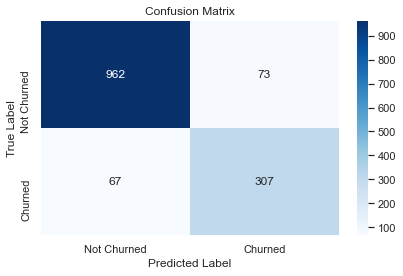

In [18]:
# Confusion matrix Heatmap

mlt.figure(figsize=(6, 4))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])

mlt.title("Confusion Matrix")
mlt.xlabel("Predicted Label")
mlt.ylabel("True Label")
mlt.tight_layout()
mlt.show()